# SOMMAIRE:
* [Importations](#import)
* [Observation de notre dataset](#obs)
* [Modification du dataset](#modif)
* [Gestion des null](#null)
* [Dataset final](#final)

## Importations <a class="anchor" id="import"></a>

In [1]:
# Import librairie Pandas

import pandas as pd

In [2]:
# Import librairie Seaborn

import seaborn as sns

In [3]:
# Import librairie Matplotlib

import matplotlib.pyplot as plt

In [4]:
# Import dataset immobilier : train_data

df_immobilier  = pd.read_csv("train_data.csv")
df_immobilier.head(10)

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
5,8781,-118.32,33.79,32.0,2381.0,467.0,1264.0,488.0,4.1477,315100.0,<1H OCEAN
6,5438,-118.43,34.01,31.0,2526.0,528.0,1046.0,504.0,4.7009,500001.0,<1H OCEAN
7,14856,-117.07,32.64,32.0,5135.0,1025.0,2152.0,944.0,4.1325,172800.0,NEAR OCEAN
8,19956,-119.33,36.22,9.0,3748.0,644.0,1955.0,620.0,4.2011,108100.0,INLAND
9,17175,-122.47,37.50,18.0,2297.0,416.0,1086.0,381.0,4.8750,334600.0,NEAR OCEAN


## Observation de notre dataset <a class="anchor" id="obs"></a>

In [5]:
# Je veux voir les dimensions de mon dataset

df_immobilier.shape

(16512, 11)

In [6]:
# J'observe les features du dataset et leurs types
# On devrait changer en int le type des colonnes :
# median_age, housing_median_age, total_rooms, total_bedrooms

df_immobilier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


In [7]:
# Informations sur les quartiles, la moyenne, ecarts type, les valeurs minimale et maximum

df_immobilier.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,10295.498789,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453
std,5941.973488,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661
min,0.000000,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,5178.750000,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000
50%,10263.500000,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,15438.250000,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
# On observe si des Nan values son presentes dans notre dataset
# Ici, 176 Nan values pour la colonne "total_bedrooms"

nan_value = df_immobilier.isnull().sum()
nan_value

Unnamed: 0              0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
# Je veux connaitre les valeurs pour la colonne "ocean_proximity " et leurs nombres
# On peut voir ici 5 type de proximity par rapport à l'ocean dans un type exceptionnel (ISLAND) avec seulement 4 valeurs correspondantes

type_proximity = df_immobilier["ocean_proximity"].value_counts()
type_proximity

<1H OCEAN     7312
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
ISLAND           4
Name: ocean_proximity, dtype: int64

KeyboardInterrupt: 

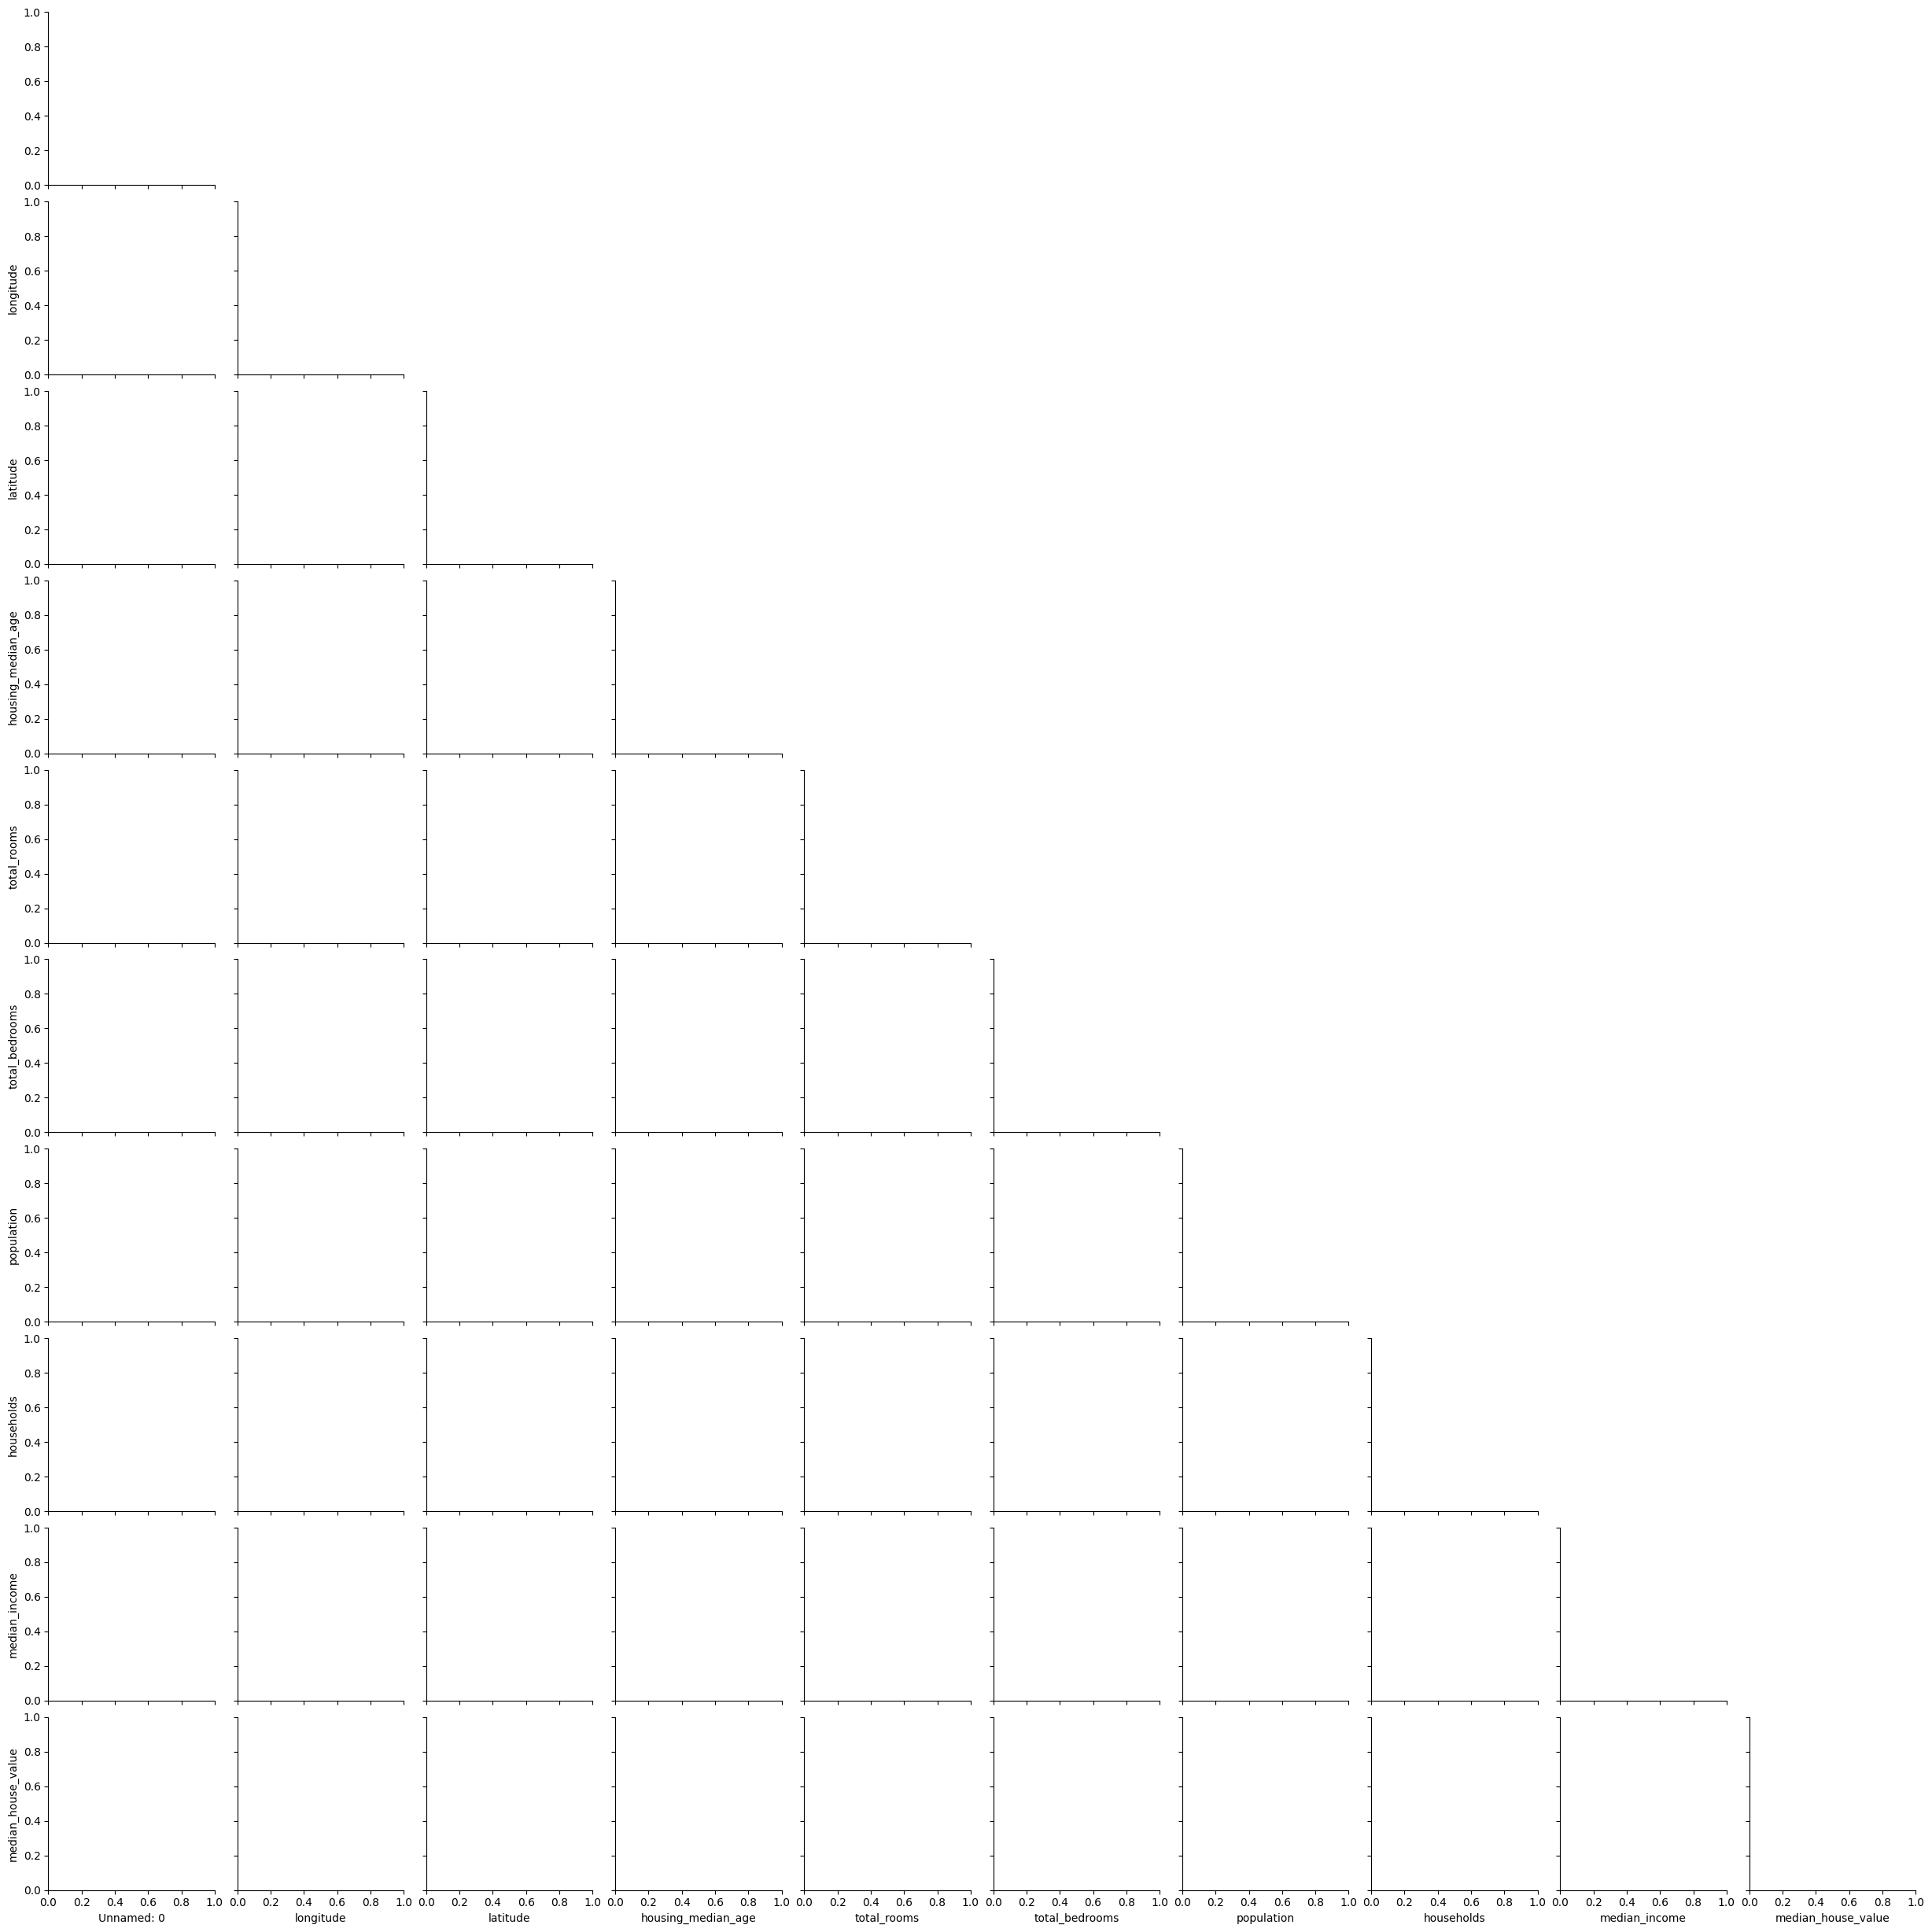

In [10]:
# Graphique pour avoir une vue d'ensemble de notre dataset
# On observe 3 droites pour la feature total rooms en lien avec households, population,total_bedrooms.
# On observe 2 droites pour la total bedrooms en lien avec population et households
# On observe 1 droite pour population avec household

graph1 = sns.PairGrid(data = df_immobilier,corner = True)
graph1.map_lower(sns.kdeplot, hue = None, levels = 4, color = ".2")
graph1.map_lower(sns.scatterplot, marker = "+")
graph1.map_diag(sns.histplot, element = 'step', linewidth=0,kde=True)
graph1.add_legend(frameon=True)
graph1.legend.set_bbox_to_anchor((.61,.6))

In [ ]:
# Graphique de correlation pour notre dataset
# Comme sur le graphique precedent, on observe une forte correlation positive au centre liés au même features
# De plus les features median_income et median_house_value sont egalement correlées positivement

corr_df = df_immobilier.corr(method='pearson')
#plt.matshow(corr_df)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True,cmap=plt.cm.Blues)
plt.show()

In [10]:
df_immobilier

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


## Modification du dataset <a class="anchor" id="modif"></a>

In [ ]:
# rename, drop, new_column

In [12]:
# Enlever les colonnes : unnamed: 0, latitude et longitude

df_immobilier = df_immobilier.drop(columns=["Unnamed: 0","latitude", "longitude"])
df_immobilier

KeyError: "['Unnamed: 0', 'latitude', 'longitude'] not found in axis"

In [14]:
# Renomme colonne population pour une meilleure comprehension

df_immobilier.rename(columns = {'population':'total_residents'}, inplace = True)
df_immobilier

,housing_median_age,total_rooms,total_bedrooms,total_residents,households,median_income,median_house_value,ocean_proximity
0,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...
16507,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [17]:
# Regroupement par rapport a l'ancienetée d'une maison et sa valeur median

house_age_price = df_immobilier.groupby(['housing_median_age', 'median_house_value'])
house_age_price.first()

total_rooms  total_bedrooms  \
housing_median_age median_house_value                                
1.0                55000.0                     6.0             2.0   
                   141700.0                   83.0            15.0   
                   189200.0                 2254.0           328.0   
                   191300.0                 2062.0           343.0   
2.0                47500.0                    96.0            18.0   
...                                            ...             ...   
52.0               494400.0                 1345.0           291.0   
                   494700.0                 2425.0           435.0   
                   498400.0                 3034.0           406.0   
                   500000.0                 2994.0           821.0   
                   500001.0                 3146.0           478.0   

                                       total_residents  households  \
housing_median_age median_house_value                                
1.0                55000.0                         8.0         2.0   
                   141700.0                       32.0        15.0   
                   189200.0                      402.0       112.0   
                   191300.0                      872.0       268.0   
2.0                47500.0                        30.0        16.0   
...                                                ...         ...   
52.0               494400.0                      560.0       294.0   
                   494700.0                      962.0       412.0   
                   498400.0                     1158.0       399.0   
                   500000.0                     1240.0       779.0   
                   500001.0                     1143.0       455.0   

                                       median_income ocean_proximity  
housing_median_age median_house_value                                 
1.0                55000.0                    1.6250          INLAND  
                   141700.0                   4.8750          INLAND  
                   189200.0                   4.2500          INLAND  
                   191300.0                   5.2636          INLAND  
2.0                47500.0                    5.3374          INLAND  
...                                              ...             ...  
52.0               494400.0                   3.7159        NEAR BAY  
                   494700.0                   5.8587       <1H OCEAN  
                   498400.0                   6.2976       <1H OCEAN  
                   500000.0                   3.3715        NEAR BAY  
                   500001.0                   6.1407        NEAR BAY  

[14337 rows x 6 columns]

## Gestion des null <a class="anchor" id="null"></a>

## Dataset final <a class="anchor" id="final"></a>